In [2]:
# Cargo librerías 
import sys
import seaborn as sns
import numpy as np 
import random 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
# Para realizar los gráficos debajo de la celda de código
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargo los datos
directorio_actual = os.getcwd()
data_path = os.path.join(directorio_actual, "data")

# La data de composición está separada por ';' y el encoding no es utf-8
naf_composicion = pd.read_csv(os.path.join(data_path, "integrantes-del-naf-por-composicion-individual.csv"), encoding = 'latin-1', sep = ';') 

# La data de educación sí esta separada por ',' y el encoding es utf-8
naf_educacion = pd.read_csv(os.path.join(data_path, "integrantes-del-naf-segun-el-nivel-educativo-alcanzado.csv")) 

# Junto los dos data sets
naf_data = naf_composicion.merge(naf_educacion)

In [ ]:
naf_composicion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604 entries, 0 to 3603
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   cod_pais                             3604 non-null   int64 
 1   nom_pais                             3604 non-null   object
 2   region                               3604 non-null   object
 3   cod_provincia                        3604 non-null   int64 
 4   nom_provincia                        3604 non-null   object
 5   cod_depto                            3604 non-null   int64 
 6   nom_depto                            3604 non-null   object
 7   Cant_de_naf                          3604 non-null   int64 
 8   año_de_registro                      3604 non-null   object
 9   integ_del_NAF                        3604 non-null   int64 
 10  integ_menores_de_edad                3604 non-null   int64 
 11  integ_mayores_de_edad                3604 n

In [ ]:
naf_composicion.describe()

,cod_pais,cod_provincia,cod_depto,Cant_de_naf,integ_del_NAF,integ_menores_de_edad,integ_mayores_de_edad,integ_que_trabajan_en_el_predio,cant_de_mujeres_integrantes_del_NAF,cant_de_varones_integrantes_del_NAF
count,3604.0,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000
mean,32.0,39.443951,149.432020,38.724195,129.737791,49.718646,79.947003,77.261931,62.752497,66.618202
std,0.0,28.690921,193.764264,93.620486,323.878068,141.854717,185.083572,192.440248,156.164636,165.192241
min,32.0,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.0,10.000000,42.000000,4.000000,12.000000,3.000000,8.000000,4.000000,5.000000,6.000000
50%,32.0,38.000000,84.000000,14.000000,39.000000,12.000000,27.000000,19.000000,18.000000,20.000000
75%,32.0,66.000000,133.000000,37.000000,118.000000,40.000000,77.000000,68.000000,56.250000,61.000000
max,32.0,94.000000,882.000000,3114.000000,7822.000000,3183.000000,4855.000000,4023.000000,3480.000000,3927.000000


In [ ]:
naf_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604 entries, 0 to 3603
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cod_pais              3604 non-null   int64 
 1   nom_pais              3604 non-null   object
 2   region                3604 non-null   object
 3   cod_provincia         3604 non-null   int64 
 4   nom_provincia         3604 non-null   object
 5   cod_depto             3604 non-null   int64 
 6   nom_depto             3604 non-null   object
 7   año_de_registro       3604 non-null   object
 8   Cant_de_naf           3604 non-null   int64 
 9   integ_del_NAF         3604 non-null   int64 
 10  sin_educacion_formal  3604 non-null   int64 
 11  educacion_inicial     3604 non-null   int64 
 12  educacion_primaria    3604 non-null   int64 
 13  educacion_secundaria  3604 non-null   int64 
 14  educacion_cens        3604 non-null   int64 
 15  educacion_superior    3604 non-null   

In [ ]:
naf_educacion.describe()

,cod_pais,cod_provincia,cod_depto,Cant_de_naf,integ_del_NAF,sin_educacion_formal,educacion_inicial,educacion_primaria,educacion_secundaria,educacion_cens,educacion_superior,educacion_especial
count,3604.0,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.00000
mean,32.0,39.443951,149.432020,38.724195,129.737791,11.942564,8.374584,74.032464,25.991676,0.673141,5.120977,0.20172
std,0.0,28.690921,193.764264,93.620486,323.878068,39.858698,31.442207,203.502641,52.804584,2.165441,9.755479,0.70845
min,32.0,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,32.0,10.000000,42.000000,4.000000,12.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.00000
50%,32.0,38.000000,84.000000,14.000000,39.000000,2.000000,1.000000,19.000000,10.000000,0.000000,2.000000,0.00000
75%,32.0,66.000000,133.000000,37.000000,118.000000,9.000000,5.000000,62.000000,28.000000,0.000000,6.000000,0.00000
max,32.0,94.000000,882.000000,3114.000000,7822.000000,1158.000000,985.000000,4863.000000,1607.000000,46.000000,176.000000,11.00000


In [ ]:
naf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 0 to 3603
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   cod_pais                             3604 non-null   int64 
 1   nom_pais                             3604 non-null   object
 2   region                               3604 non-null   object
 3   cod_provincia                        3604 non-null   int64 
 4   nom_provincia                        3604 non-null   object
 5   cod_depto                            3604 non-null   int64 
 6   nom_depto                            3604 non-null   object
 7   Cant_de_naf                          3604 non-null   int64 
 8   año_de_registro                      3604 non-null   object
 9   integ_del_NAF                        3604 non-null   int64 
 10  integ_menores_de_edad                3604 non-null   int64 
 11  integ_mayores_de_edad                3604 n

In [ ]:
naf_data.describe()

,cod_pais,cod_provincia,cod_depto,Cant_de_naf,integ_del_NAF,integ_menores_de_edad,integ_mayores_de_edad,integ_que_trabajan_en_el_predio,cant_de_mujeres_integrantes_del_NAF,cant_de_varones_integrantes_del_NAF,sin_educacion_formal,educacion_inicial,educacion_primaria,educacion_secundaria,educacion_cens,educacion_superior,educacion_especial
count,3604.0,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.00000
mean,32.0,39.443951,149.432020,38.724195,129.737791,49.718646,79.947003,77.261931,62.752497,66.618202,11.942564,8.374584,74.032464,25.991676,0.673141,5.120977,0.20172
std,0.0,28.690921,193.764264,93.620486,323.878068,141.854717,185.083572,192.440248,156.164636,165.192241,39.858698,31.442207,203.502641,52.804584,2.165441,9.755479,0.70845
min,32.0,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,32.0,10.000000,42.000000,4.000000,12.000000,3.000000,8.000000,4.000000,5.000000,6.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.00000
50%,32.0,38.000000,84.000000,14.000000,39.000000,12.000000,27.000000,19.000000,18.000000,20.000000,2.000000,1.000000,19.000000,10.000000,0.000000,2.000000,0.00000
75%,32.0,66.000000,133.000000,37.000000,118.000000,40.000000,77.000000,68.000000,56.250000,61.000000,9.000000,5.000000,62.000000,28.000000,0.000000,6.000000,0.00000
max,32.0,94.000000,882.000000,3114.000000,7822.000000,3183.000000,4855.000000,4023.000000,3480.000000,3927.000000,1158.000000,985.000000,4863.000000,1607.000000,46.000000,176.000000,11.00000


array([[<AxesSubplot:title={'center':'cod_pais'}>,
        <AxesSubplot:title={'center':'cod_provincia'}>,
        <AxesSubplot:title={'center':'cod_depto'}>,
        <AxesSubplot:title={'center':'Cant_de_naf'}>],
       [<AxesSubplot:title={'center':'integ_del_NAF'}>,
        <AxesSubplot:title={'center':'integ_menores_de_edad'}>,
        <AxesSubplot:title={'center':'integ_mayores_de_edad'}>,
        <AxesSubplot:title={'center':'integ_que_trabajan_en_el_predio'}>],
       [<AxesSubplot:title={'center':'cant_de_mujeres_integrantes_del_NAF'}>,
        <AxesSubplot:title={'center':'cant_de_varones_integrantes_del_NAF'}>,
        <AxesSubplot:title={'center':'sin_educacion_formal'}>,
        <AxesSubplot:title={'center':'educacion_inicial'}>],
       [<AxesSubplot:title={'center':'educacion_primaria'}>,
        <AxesSubplot:title={'center':'educacion_secundaria'}>,
        <AxesSubplot:title={'center':'educacion_cens'}>,
        <AxesSubplot:title={'center':'educacion_superior'}>],
    

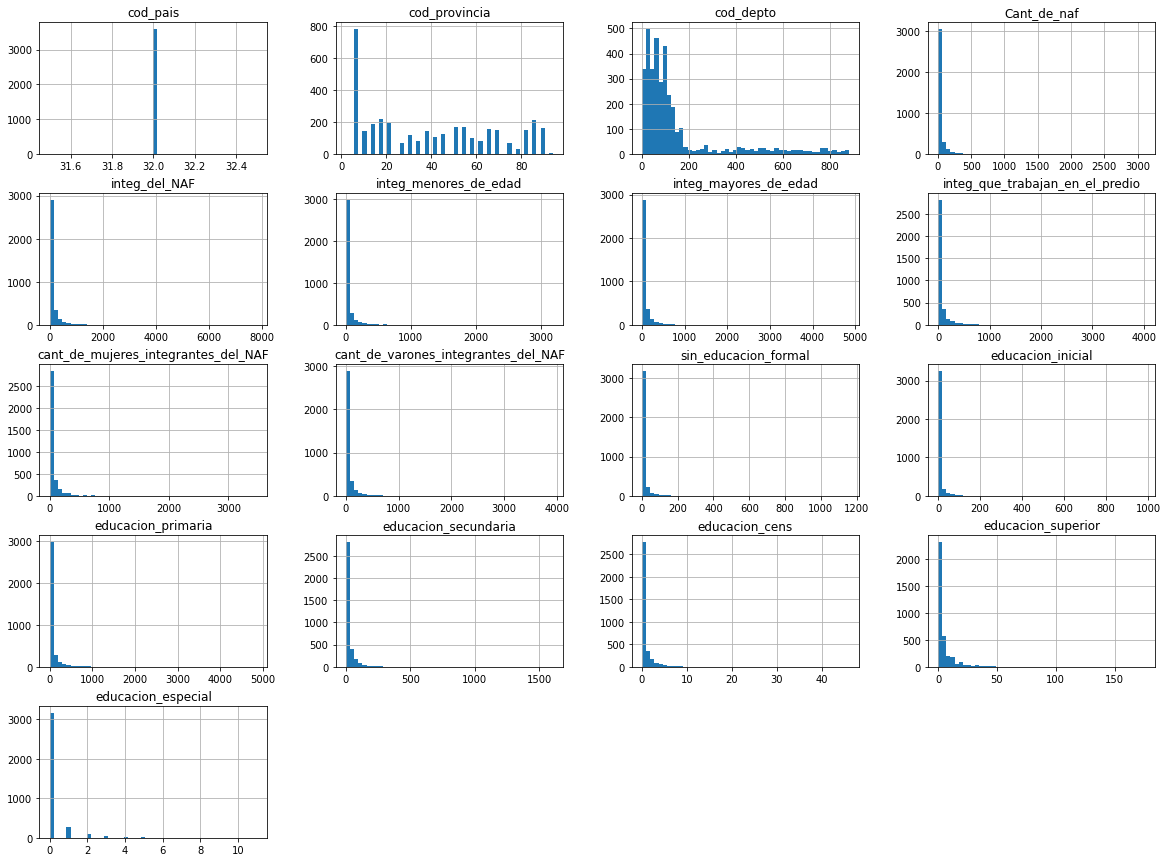

In [ ]:
naf_data.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:xlabel='integ_menores_de_edad', ylabel='integ_menores_de_edad'>,
        <AxesSubplot:xlabel='integ_mayores_de_edad', ylabel='integ_menores_de_edad'>,
        <AxesSubplot:xlabel='integ_que_trabajan_en_el_predio', ylabel='integ_menores_de_edad'>,
        <AxesSubplot:xlabel='cant_de_mujeres_integrantes_del_NAF', ylabel='integ_menores_de_edad'>],
       [<AxesSubplot:xlabel='integ_menores_de_edad', ylabel='integ_mayores_de_edad'>,
        <AxesSubplot:xlabel='integ_mayores_de_edad', ylabel='integ_mayores_de_edad'>,
        <AxesSubplot:xlabel='integ_que_trabajan_en_el_predio', ylabel='integ_mayores_de_edad'>,
        <AxesSubplot:xlabel='cant_de_mujeres_integrantes_del_NAF', ylabel='integ_mayores_de_edad'>],
       [<AxesSubplot:xlabel='integ_menores_de_edad', ylabel='integ_que_trabajan_en_el_predio'>,
        <AxesSubplot:xlabel='integ_mayores_de_edad', ylabel='integ_que_trabajan_en_el_predio'>,
        <AxesSubplot:xlabel='integ_que_trabajan_en_el_predio', ylabel=

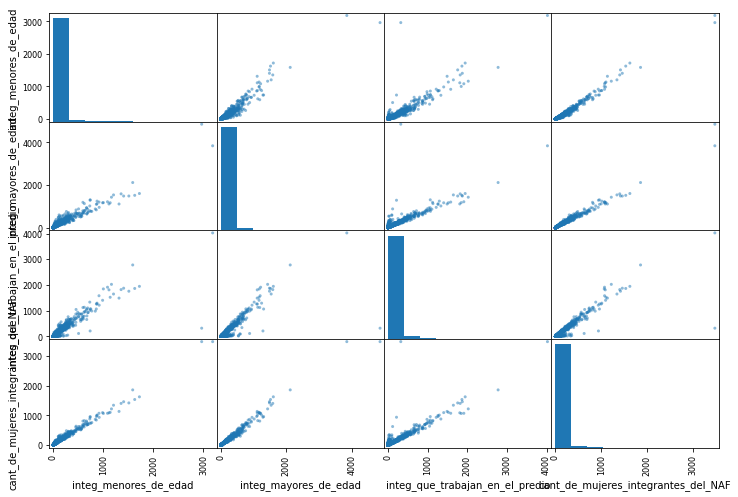

In [ ]:
algunas_var = ["nom_provincia", "integ_menores_de_edad", "integ_mayores_de_edad",
              "integ_que_trabajan_en_el_predio", "cant_de_mujeres_integrantes_del_NAF"]
scatter_matrix(naf_data[algunas_var], figsize=(12, 8))            